# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from os import listdir
np.set_printoptions(suppress=True)

# Trực quan hóa dữ liệu của các ngày

Nhập dữ liệu từ ngày 26/2/2023 đến nay

In [2]:
files = [f for f in listdir('./data/')]

df_dict = {}

for file in files:
    url = './data/' + file
    df_dict[file[:-4]] = pd.read_csv(url)

# Tình hình dịch bệnh ở các quốc gia từ ngày 26/02/2023 như thế nào?

Để xem xét tình hình dịch bệnh ở các quốc gia hiện nay, ta có thể đặt 1 số câu hỏi như: 
* Các ca tử vong mới, các ca nhiễm mới và các ca hồi phục mới những ngày gần đây như thế nào ở các quốc gia?
* Độ tương quan của các ca nhiễm mới, các ca tử vong mới và các ca hồi phục mới ở các quốc gia này như thế nào?
* Những quốc gia nào có tỷ lệ xét nghiệm cao nhất và điều này liên quan gì đến số lượng người nhiễm bệnh và số lượng tử vong của họ?

In [3]:
country_list = list(df_dict.values())[0].sort_values(by=['TotalCases'], ascending=False).iloc[:6]['Country,Other'].to_list()
country_list.remove('World')

## Các ca tử vong mới, các ca nhiễm mới và các ca hồi phục mới những ngày gần đây như thế nào ở các quốc gia?

Bằng cách xem xét các ca tử vong mới, các ca nhiễm mới và các ca hồi phục mới, chúng ta có thể thấy tình hình đại dịch ở các quốc gia trong những ngày gần đây.

In [4]:
date_list = []
new_death = []
new_cases = []
new_recovered = []
for key, item in df_dict.items():
    date_list.append(key)
    temp = item.set_index('Country,Other')
    new_death.append(temp['NewDeaths'][country_list].to_list())
    new_cases.append(temp['NewCases'][country_list].to_list())
    new_recovered.append(temp['NewRecovered'][country_list].to_list())

new_death_df = pd.DataFrame(new_death, columns=country_list, index=date_list)
new_cases_df = pd.DataFrame(new_cases, columns=country_list, index=date_list)
new_recovered_df = pd.DataFrame(new_recovered, columns=country_list, index=date_list)

new_death_df.index = pd.to_datetime(new_death_df.index, format='%d-%m-%Y')
new_cases_df.index = pd.to_datetime(new_cases_df.index, format='%d-%m-%Y')
new_recovered_df.index = pd.to_datetime(new_recovered_df.index, format='%d-%m-%Y')

new_death_df = new_death_df.sort_index()
new_cases_df = new_cases_df.sort_index()
new_recovered_df = new_recovered_df.sort_index()

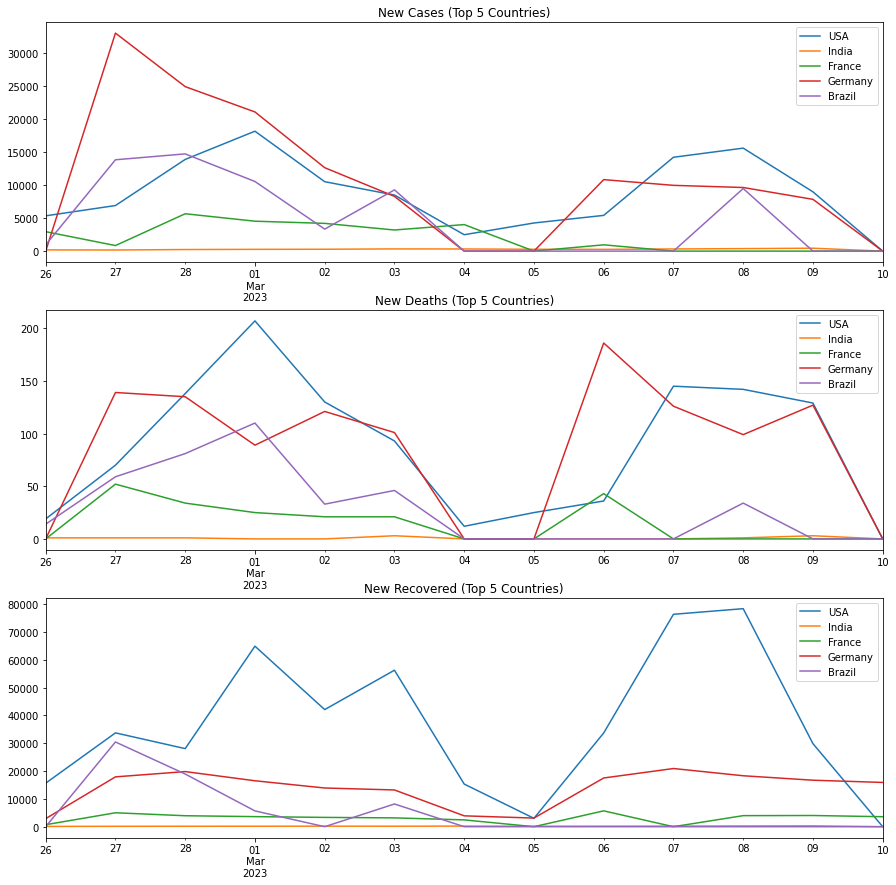

In [5]:
#visualize 3 charts in one figure
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
new_cases_df.plot(ax=ax[0], title='New Cases (Top 5 Countries)')
new_death_df.plot(ax=ax[1], title='New Deaths (Top 5 Countries)')
new_recovered_df.plot(ax=ax[2], title='New Recovered (Top 5 Countries)')
plt.show()

* Từ biểu đồ, có thể thấy đại dịch vẫn đang lan rộng trên thế giới, nhưng đã có một số tín hiệu đáng mừng. Các ca mắc mới và tử vong mới đang giảm và duy trì ở mức thấp, trong khi các ca phục hồi mới đang gia tăng và ổn định ở các quốc gia có nhiều ca nhiễm nhất.
* Trong khi đó, tại Mỹ và Đức những ngày qua số ca mắc mới và tử vong có sự gia tăng đáng kể.
* Mỹ cho thấy họ có Hệ thống chăm sóc y tế tốt vì số ca mắc mới khỏi bệnh luôn cao hơn số ca mắc mới và số ca tử vong.

## Độ tương quan của các ca nhiễm mới, các ca tử vong mới và các ca hồi phục mới ở các quốc gia này như thế nào?

Trả lời câu hỏi này sẽ giúp chúng ta phần nào hiểu được tình hình đại dịch ở các quốc gia, nếu độ tương quan giữa các ca nhiễm mới và các ca tử vong cao và độ tương quan giữa các ca nhiễm mới và các ca bình phục thấp thì có nghĩa là kế hoạch chống dịch của quốc gia đó không tốt, và ngược lại.

In [6]:
#find the sum of new cases, new death, new recovered of each country
total_new_death = []
total_new_cases = []
total_new_recovered = []
for country in country_list:
    total_new_death.append(new_death_df[country].sum())
    total_new_cases.append(new_cases_df[country].sum())
    total_new_recovered.append(new_recovered_df[country].sum())

#convert to dataframe
total_new_death_df = pd.DataFrame(total_new_death, index=country_list, columns=['Total New Death'])
total_new_cases_df = pd.DataFrame(total_new_cases, index=country_list, columns=['Total New Cases'])
total_new_recovered_df = pd.DataFrame(total_new_recovered, index=country_list, columns=['Total New Recovered'])

#concat all the dataframe
corr_df = pd.concat([total_new_death_df, total_new_cases_df, total_new_recovered_df], axis=1)

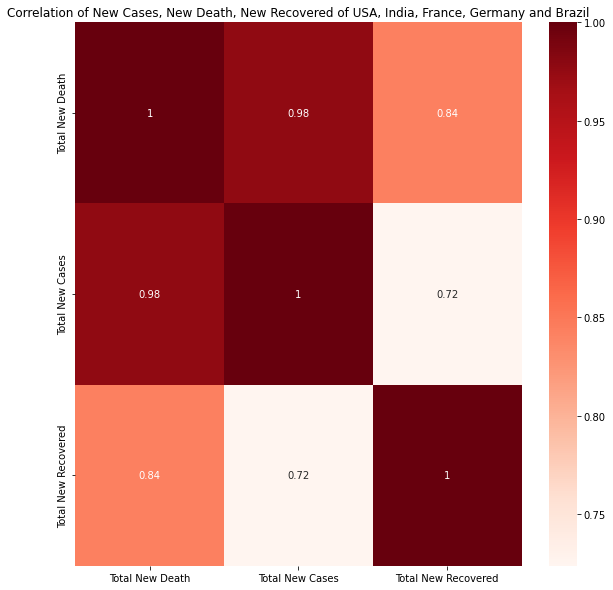

In [7]:
#visualize the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr_df.corr(), annot=True, cmap='Reds')
plt.title('Correlation of New Cases, New Death, New Recovered of USA, India, France, Germany and Brazil')
plt.show()

Từ biểu đồ ta có thể thấy rằng độ tương quan giữa các ca nhiễm mới và các ca tử vong mới cao, trong khi độ tương quan giữa các ca nhiễm mới và các ca hồi phục mới thấp. Điều này cho thấy rằng các quốc gia này đang có kế hoạch chống dịch không tốt trong khoảng thời gian từ ngày 26/2/2023 đến nay.

## Những quốc gia nào có tỷ lệ xét nghiệm cao nhất và điều này liên quan gì đến số lượng người nhiễm bệnh và số lượng tử vong của họ?

Trả lời câu hỏi này sẽ cho ta biết sự ứng phó với đại dịch covid-19 của các quốc gia.

In [8]:
country_list = list(df_dict.values())[0].sort_values(by=['TotalCases'], ascending=False)['Country,Other'].to_list()
country_list.remove('World')

In [9]:
#find the latest date
date_objs = [datetime.strptime(date, '%d-%m-%Y') for date in df_dict.keys()]
latest_date = max(date_objs)
latest_date_str = latest_date.strftime('%d-%m-%Y')
latest_date_str

'10-03-2023'

In [10]:
total_tests = []
total_cases = []
total_deaths = []
for country in country_list:
    total_cases.append(df_dict[latest_date_str].set_index('Country,Other')['TotalCases'][country])
    total_tests.append(df_dict[latest_date_str].set_index('Country,Other')['TotalTests'][country])
    total_deaths.append(df_dict[latest_date_str].set_index('Country,Other')['TotalDeaths'][country])

total_tests_df = pd.DataFrame(total_tests, index=country_list, columns=['total_tests'])
total_cases_df = pd.DataFrame(total_cases, index=country_list, columns=['total_cases'])
total_death_df = pd.DataFrame(total_deaths, index=country_list, columns=['total_deaths'])

total_tests_df = total_tests_df.sort_index()
total_cases_df = total_cases_df.sort_index()
total_death_df = total_death_df.sort_index()

test_percent_df = pd.concat([total_tests_df, total_cases_df, total_death_df], axis=1)
#compute the test percentage compared to the total test in the world
test_percent_df['test_percentage'] = test_percent_df['total_tests']/test_percent_df['total_tests'].sum()*100
test_percent_df = test_percent_df.sort_values(by=['test_percentage'], ascending=False)

<AxesSubplot:title={'center':'Top 20 countries having the highest test percentage'}>

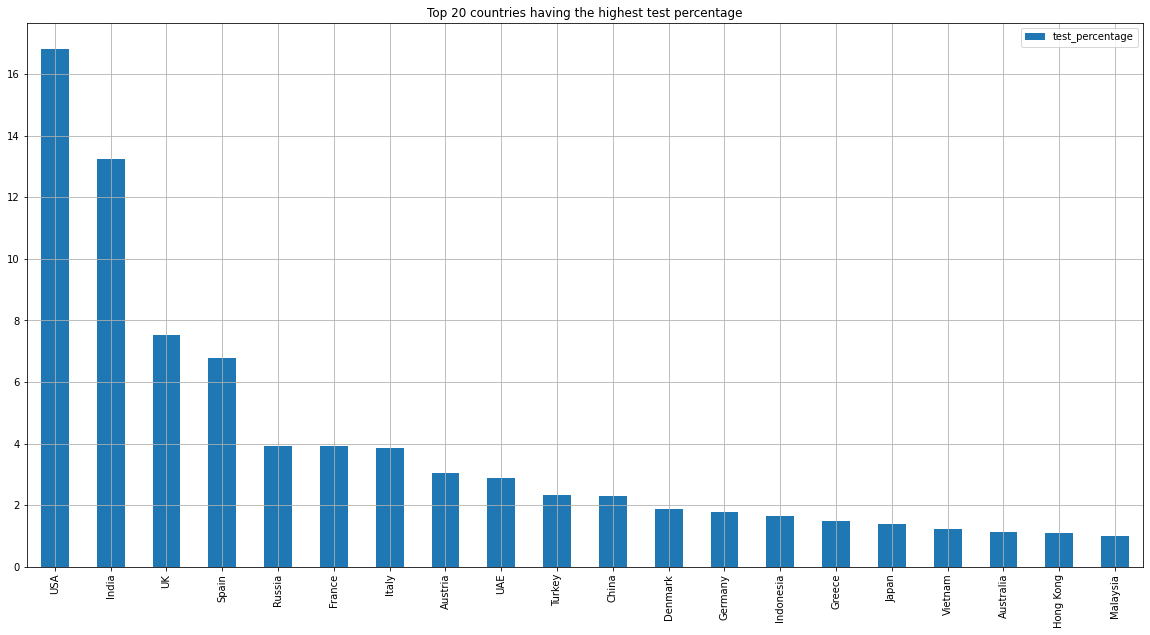

In [11]:
#visualize the data in a bar chart
test_percent_df.head(20).plot(kind='bar', y='test_percentage', figsize=(20,10), title='Top 20 countries having the highest test percentage', grid=True)

Như ta có thể thấy từ biểu đồ, đây là 20 quốc gia có tỉ lệ xét nghiệm cao nhất (trong đó có Việt Nam). \
Vậy, con số ca nhiễm và tử vong của các quốc gia này mối tương quan như thế nào?

Text(0.5, 1.0, 'Total Tests vs Total Cases')

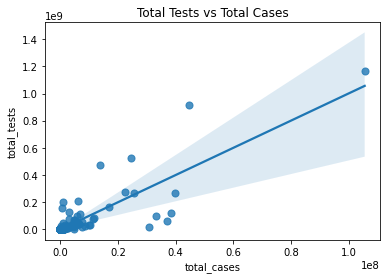

In [12]:
# create the first plot
sns.regplot(x='total_cases', y='total_tests', data=test_percent_df, scatter_kws={"s": 50})
#plt.xlim(0, 0.2)
#plt.ylim(0, 0.2)
plt.title('Total Tests vs Total Cases')

Text(0.5, 1.0, 'Total Tests vs Total Deaths')

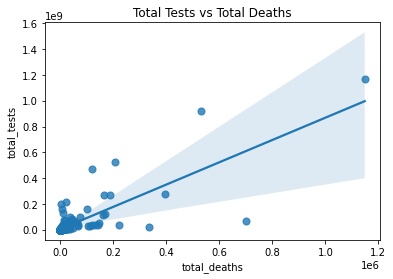

In [13]:
# create the second plot
sns.regplot(x='total_deaths', y='total_tests', data=test_percent_df, scatter_kws={"s": 50})
#plt.xlim(0, 0.2)
#plt.ylim(0, 0.2)
plt.title('Total Tests vs Total Deaths')

Như ta có thể thấy, ở biểu đồ tương quan giữa số ca mắc và số ca test, khi số test tăng thì số ca nhiễm cũng tăng. \
Ngược lại, khi số test tăng thì số ca tử vong chỉ nằm ở mức thấp (0-0.2).  

<AxesSubplot:>

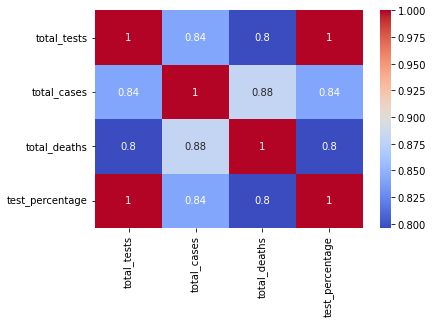

In [14]:
sns.heatmap(test_percent_df.corr(), annot=True, cmap='coolwarm')

Từ những biểu đồ trên, ta có thể kết luận rằng các quốc gia có tỉ lệ xét nghiệm cao thì có thể phát hiện được nhiều ca nhiễm hơn, nhưng số ca tử vong lại thấp hơn. Điều này có nghĩa là khi các ca mắc được phát hiện sớm, họ có thể được điều trị kịp thời và có tỉ lệ sống sót cao hơn.